In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

#### First, read in your dataframe of images with bounding box coordinates

In [3]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass

In [38]:
df = pydicom.dcmread("dicom_00013659_019.dcm").pixel_array

<IPython.core.display.Javascript object>


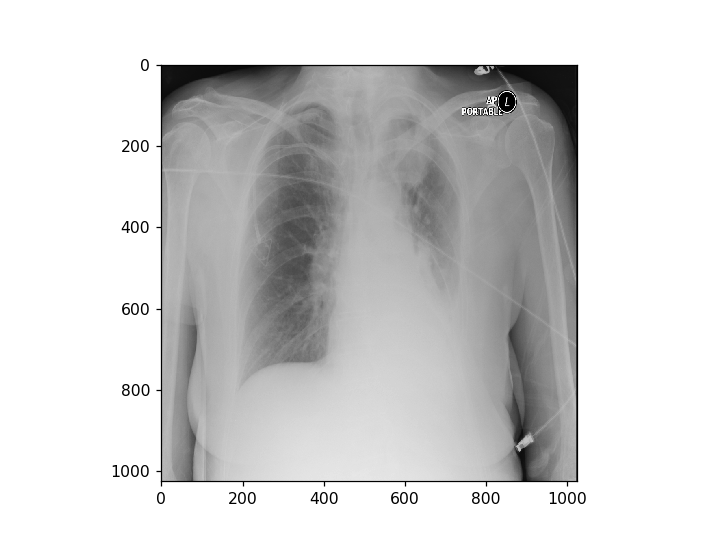

In [41]:
image = plt.imshow(df, cmap = 'gray')

<IPython.core.display.Javascript object>


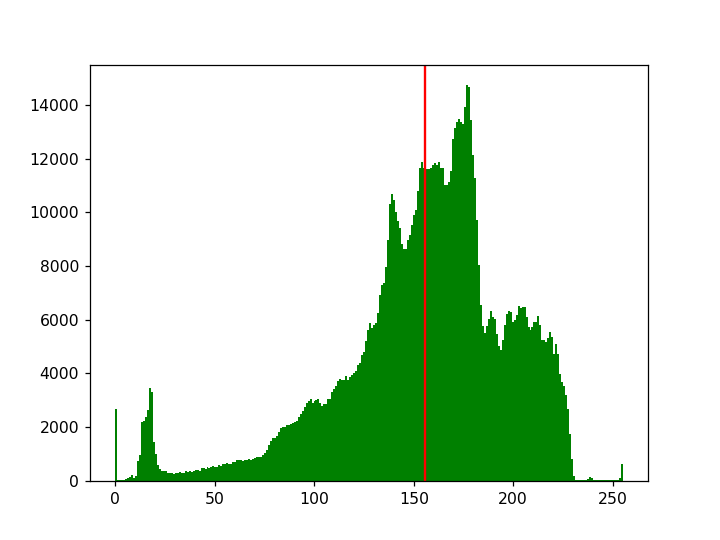

<function matplotlib.pyplot.show(*args, **kw)>

In [62]:
plt.hist(df.ravel(), bins = 256,color='green')
plt.show

In [63]:
print(np.mean(df))
plt.axvline(np.mean(df),  label='Mean: {}'.format(np.mean(df)), c='red')

155.60211944580078


In [52]:
np.std(df)

43.776203799182035

In [59]:
mean_df = np.mean(df)
std_df = np.std(df)
new_df = (df - mean_df)/ std_df

<IPython.core.display.Javascript object>


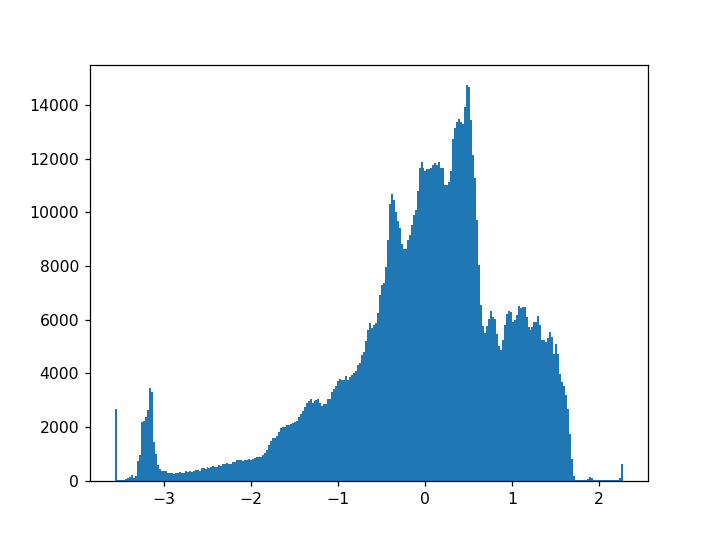

In [68]:
plt.hist(new_df.ravel(), bins = 256)
plt.show()

<IPython.core.display.Javascript object>


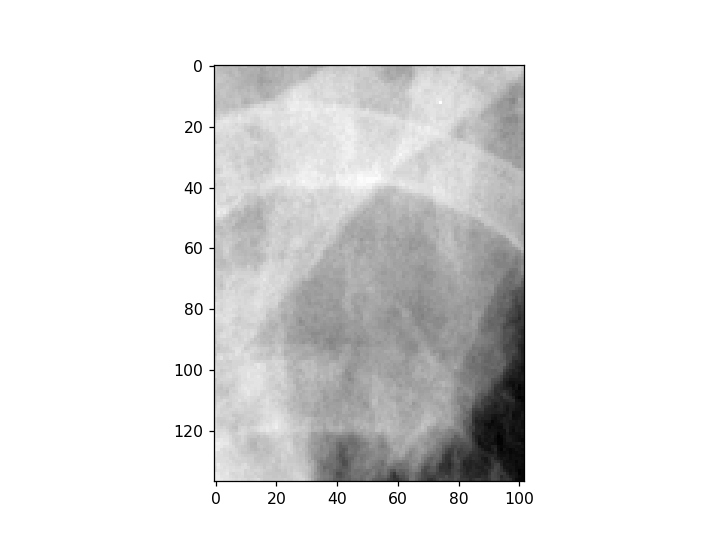

In [75]:
plt.imshow(df[168:(168 + 137), 560:(560 + 102)], cmap = 'gray')

<IPython.core.display.Javascript object>


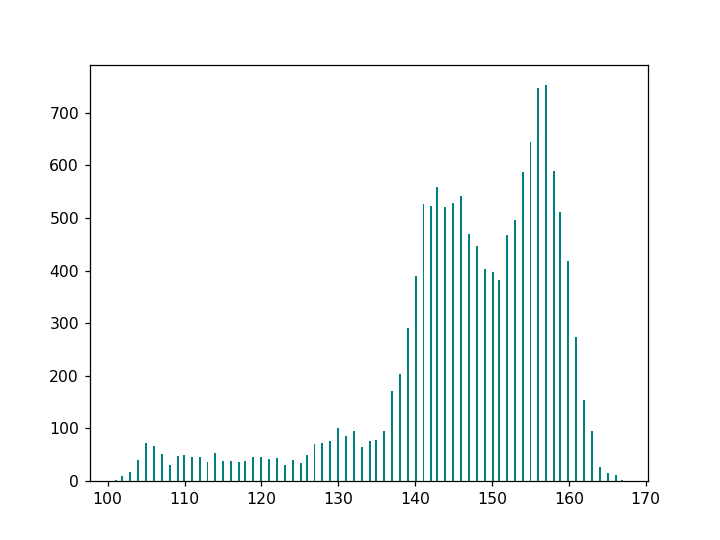

In [80]:
plt.hist(df[168:(168 + 137), 560:(560 + 102)].ravel(), bins = 256, color = 'teal')
plt.show()